# K Fold

- Código Versão 1.0 - 19 OUT 23

- Esse caderno tem o objetivo de separar o dataset em partições, com a finalidade de executar os testes.

- A tentativa de execução direta, utilizando um laço for, não obteve o resultado esperado, uma vez que gerou erro de memória.

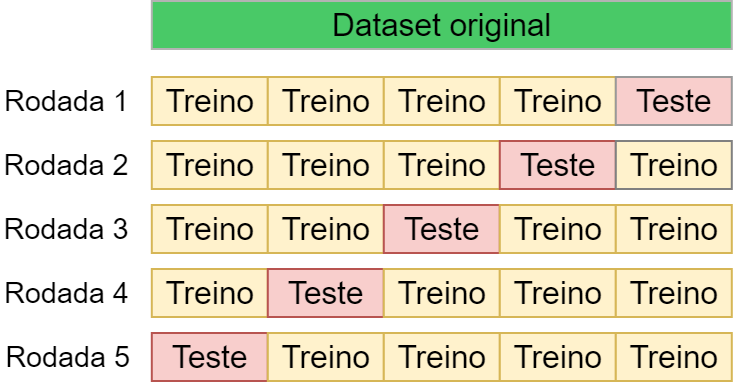

- Amostragem estratificada, **kfold**.
- Semente 42.
- K = 5.

## Bibliotecas

In [4]:
!pip install -q -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00


In [5]:
from sklearn.model_selection import StratifiedKFold

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [7]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [8]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,sklearn

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

numpy  : 1.23.5
pandas : 1.5.3
torch  : 2.1.0+cu118
sklearn: 1.2.2



## Importando o dataset

In [9]:
df = pd.read_csv('dataset.csv')

In [21]:
df

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto
0,88,estudo dos efeitos de dircm em mísseis infrave...,"caio augusto de melo silvestre, lester de abre...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O crescente emprego de mísseis de ombro infrav...,"Mísseis Infravermelhos, especialmente os do t..."
1,125,caracterização de capacitores cerâmicos na fai...,"silva neto, l. p., rossi, j. o., barroso j. j.",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,Materiais dielétricos com baixas perdas e alta...,I. INTRODUÇÃO Cerâmicas dielétricas encontram ...
2,35,avaliação de algoritmos de machine learning na...,"fabiano g. da silva, lucas p. ramos, bruna g. ...",https://www.sige.ita.br/edicoes-anteriores/202...,Artigo de Simpósio,1,"Recentemente, a disponibilidade de dados públi...",I. INTRODUÇÃO As imagens orbitais têm sido uti...
3,147,avaliação de desempenho de redes tolerantes a ...,"davi marinho de a falcão, ronaldo moreira sall...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,1,Disruption-Tolerant Networks (DTN) são uma evo...,1. Introdução Otransporte marítimo é responsá...
4,104,uma arquitetura para radar secundário nos mod...,vitor augusto ferreira santa rita,https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,Neste artigo é apresentada uma arquitetura par...,I. INTRODUÇÃO Os modos de operação A e C para...
...,...,...,...,...,...,...,...,...
163,33,centro de avaliações do exército conclui teste...,Noticiário do Exército,https://www.eb.mil.br/web/noticias/noticiario-...,Notícia,3,Rio de Janeiro (RJ) – O Centro de Avaliações d...,Rio de Janeiro (RJ) – O Centro de Avaliações d...
164,139,sarp aplicado ao monitoramento de áreas com di...,"luis claudio batista da silva, ricardo maroqui...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,3,Este trabalho apresenta um sistema para contro...,1. Introdução Sistemas de aeronaves remotamen...
165,66,planejador de missões do rádio definido por so...,"Victor Feitosa de Carvalho Souza, Fillipe Mach...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,3,No contexto das comunicações táticas baseadas ...,I. INTRODUÇÃO O conceito de rádio definido po...
166,165,verificação de velocidade de alvos marítimos m...,"marcos roberto seixas, rafael lemos paes e dav...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O valor da velocidade de alvos móveis em image...,I. INTRODUÇÃO O sistema SAR é utilizado no mei...


In [10]:
n=5
kf = StratifiedKFold(n_splits=n, random_state=RANDOM_SEED, shuffle=True)

In [20]:
i=0
kfold_manual_train = []
kfold_manual_test = []
for index_df_train, index_df_test in kf.split(df['resumo'],df['rotulo']):
    i=i+1
    kfold_manual_train.append(index_df_train)
    kfold_manual_test.append(index_df_test)
    print("*"*12)
    print("Essa é a " + str(i) + " rodada")
    print()
    print("index_df_train: "+ str(index_df_train))
    print()
    print("index_df_test: "+ str(index_df_test))

************
Essa é a 1 rodada

index_df_train: [  0   1   2   3   5   7   9  10  11  12  13  14  15  16  17  19  20  21
  22  23  25  26  27  28  30  32  33  34  35  36  37  39  40  44  45  46
  47  48  49  50  52  53  54  55  56  57  59  60  61  63  64  66  68  69
  70  71  72  75  76  77  78  79  80  81  82  83  84  85  87  91  92  93
  94  96  97  98  99 100 102 103 104 105 106 108 109 110 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 129 130 131 132 134 135
 136 137 138 139 140 141 142 143 145 146 148 150 151 153 154 155 157 158
 159 160 161 163 164 165 166 167]

index_df_test: [  4   6   8  18  24  29  31  38  41  42  43  51  58  62  65  67  73  74
  86  88  89  90  95 101 107 111 128 133 144 147 149 152 156 162]
************
Essa é a 2 rodada

index_df_train: [  0   1   3   4   5   6   7   8  10  13  14  15  16  17  18  19  20  22
  23  24  25  26  27  29  30  31  34  36  37  38  40  41  42  43  44  45
  47  49  51  52  53  54  55  57  58  59  60  61  62  63  

In [22]:
kfold_manual_train

[array([  0,   1,   2,   3,   5,   7,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  19,  20,  21,  22,  23,  25,  26,  27,  28,  30,  32,
         33,  34,  35,  36,  37,  39,  40,  44,  45,  46,  47,  48,  49,
         50,  52,  53,  54,  55,  56,  57,  59,  60,  61,  63,  64,  66,
         68,  69,  70,  71,  72,  75,  76,  77,  78,  79,  80,  81,  82,
         83,  84,  85,  87,  91,  92,  93,  94,  96,  97,  98,  99, 100,
        102, 103, 104, 105, 106, 108, 109, 110, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130,
        131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145,
        146, 148, 150, 151, 153, 154, 155, 157, 158, 159, 160, 161, 163,
        164, 165, 166, 167]),
 array([  0,   1,   3,   4,   5,   6,   7,   8,  10,  13,  14,  15,  16,
         17,  18,  19,  20,  22,  23,  24,  25,  26,  27,  29,  30,  31,
         34,  36,  37,  38,  40,  41,  42,  43,  44,  45,  47,  49,  51,
         52,  53,  54

In [23]:
kfold_manual_test

[array([  4,   6,   8,  18,  24,  29,  31,  38,  41,  42,  43,  51,  58,
         62,  65,  67,  73,  74,  86,  88,  89,  90,  95, 101, 107, 111,
        128, 133, 144, 147, 149, 152, 156, 162]),
 array([  2,   9,  11,  12,  21,  28,  32,  33,  35,  39,  46,  48,  50,
         56,  72,  78,  79,  81,  82,  85,  87,  91, 103, 106, 108, 131,
        134, 140, 141, 146, 148, 158, 159, 164]),
 array([  0,   3,  15,  16,  19,  26,  27,  34,  40,  49,  53,  60,  61,
         64,  66,  68,  69,  83,  92,  94, 110, 115, 116, 117, 119, 125,
        127, 130, 137, 143, 145, 154, 157, 167]),
 array([  1,   5,   7,  13,  14,  17,  23,  30,  36,  44,  52,  54,  55,
         59,  70,  77,  96,  97,  99, 102, 105, 113, 118, 120, 122, 126,
        132, 136, 138, 151, 160, 161, 165]),
 array([ 10,  20,  22,  25,  37,  45,  47,  57,  63,  71,  75,  76,  80,
         84,  93,  98, 100, 104, 109, 112, 114, 121, 123, 124, 129, 135,
        139, 142, 150, 153, 155, 163, 166])]

## Resultado final

- A seguir, só estamos deixando o resultado construído em uma lista, para facilitar a execução dos testes (copiar e colar no outro caderno).

In [24]:
# Criar arrays numpy com os elementos
array1 = np.array([  0,   1,   2,   3,   5,   7,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  19,  20,  21,  22,  23,  25,  26,  27,  28,  30,  32,
         33,  34,  35,  36,  37,  39,  40,  44,  45,  46,  47,  48,  49,
         50,  52,  53,  54,  55,  56,  57,  59,  60,  61,  63,  64,  66,
         68,  69,  70,  71,  72,  75,  76,  77,  78,  79,  80,  81,  82,
         83,  84,  85,  87,  91,  92,  93,  94,  96,  97,  98,  99, 100,
        102, 103, 104, 105, 106, 108, 109, 110, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130,
        131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145,
        146, 148, 150, 151, 153, 154, 155, 157, 158, 159, 160, 161, 163,
        164, 165, 166, 167])

array2 = np.array([  0,   1,   3,   4,   5,   6,   7,   8,  10,  13,  14,  15,  16,
         17,  18,  19,  20,  22,  23,  24,  25,  26,  27,  29,  30,  31,
         34,  36,  37,  38,  40,  41,  42,  43,  44,  45,  47,  49,  51,
         52,  53,  54,  55,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  73,  74,  75,  76,  77,  80,  83,
         84,  86,  88,  89,  90,  92,  93,  94,  95,  96,  97,  98,  99,
        100, 101, 102, 104, 105, 107, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 132, 133, 135, 136, 137, 138, 139, 142, 143, 144, 145,
        147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 160, 161, 162,
        163, 165, 166, 167])
array3 = np.array([  1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         17,  18,  20,  21,  22,  23,  24,  25,  28,  29,  30,  31,  32,
         33,  35,  36,  37,  38,  39,  41,  42,  43,  44,  45,  46,  47,
         48,  50,  51,  52,  54,  55,  56,  57,  58,  59,  62,  63,  65,
         67,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  84,  85,  86,  87,  88,  89,  90,  91,  93,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111,
        112, 113, 114, 118, 120, 121, 122, 123, 124, 126, 128, 129, 131,
        132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 144, 146, 147,
        148, 149, 150, 151, 152, 153, 155, 156, 158, 159, 160, 161, 162,
        163, 164, 165, 166])
array4 = np.array([  0,   2,   3,   4,   6,   8,   9,  10,  11,  12,  15,  16,  18,
         19,  20,  21,  22,  24,  25,  26,  27,  28,  29,  31,  32,  33,
         34,  35,  37,  38,  39,  40,  41,  42,  43,  45,  46,  47,  48,
         49,  50,  51,  53,  56,  57,  58,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  71,  72,  73,  74,  75,  76,  78,  79,  80,
         81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
         94,  95,  98, 100, 101, 103, 104, 106, 107, 108, 109, 110, 111,
        112, 114, 115, 116, 117, 119, 121, 123, 124, 125, 127, 128, 129,
        130, 131, 133, 134, 135, 137, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159,
        162, 163, 164, 166, 167])
array5 = np.array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  21,  23,  24,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  38,  39,  40,  41,  42,  43,
         44,  46,  48,  49,  50,  51,  52,  53,  54,  55,  56,  58,  59,
         60,  61,  62,  64,  65,  66,  67,  68,  69,  70,  72,  73,  74,
         77,  78,  79,  81,  82,  83,  85,  86,  87,  88,  89,  90,  91,
         92,  94,  95,  96,  97,  99, 101, 102, 103, 105, 106, 107, 108,
        110, 111, 113, 115, 116, 117, 118, 119, 120, 122, 125, 126, 127,
        128, 130, 131, 132, 133, 134, 136, 137, 138, 140, 141, 143, 144,
        145, 146, 147, 148, 149, 151, 152, 154, 156, 157, 158, 159, 160,
        161, 162, 164, 165, 167])

# Criar a lista composta
kfold_train = [array1, array2, array3, array4, array5]

In [25]:
# Criar as cinco arrays numpy
array1 = np.array([  4,   6,   8,  18,  24,  29,  31,  38,  41,  42,  43,  51,  58, 62,  65,  67,  73,  74,  86,  88,  89,  90,  95, 101, 107, 111, 128, 133, 144, 147, 149, 152, 156, 162])
array2 = np.array([  2,   9,  11,  12,  21,  28,  32,  33,  35,  39,  46,  48,  50, 56,  72,  78,  79,  81,  82,  85,  87,  91, 103, 106, 108, 131, 134, 140, 141, 146, 148, 158, 159, 164])
array3 = np.array([  0,   3,  15,  16,  19,  26,  27,  34,  40,  49,  53,  60,  61, 64,  66,  68,  69,  83,  92,  94, 110, 115, 116, 117, 119, 125, 127, 130, 137, 143, 145, 154, 157, 167])
array4 = np.array([  1,   5,   7,  13,  14,  17,  23,  30,  36,  44,  52,  54,  55, 59,  70,  77,  96,  97,  99, 102, 105, 113, 118, 120, 122, 126, 132, 136, 138, 151, 160, 161, 165])
array5 = np.array([ 10,  20,  22,  25,  37,  45,  47,  57,  63,  71,  75,  76,  80,  84,  93,  98, 100, 104, 109, 112, 114, 121, 123, 124, 129, 135, 139, 142, 150, 153, 155, 163, 166])

# Criar a lista composta
kfold_test = [array1, array2, array3, array4, array5]

- Verificação se foi feito corretamente

In [26]:
# Verificar se as listas são iguais elemento por elemento
sao_iguais = True

sao_iguais = all(np.array_equal(arr1, arr2) for arr1, arr2 in zip(kfold_manual_train, kfold_train))


# Imprimir o resultado
if sao_iguais:
    print("As listas são iguais elemento por elemento.")
else:
    print("As listas são diferentes em pelo menos uma posição.")

As listas são iguais elemento por elemento.


In [27]:
# Verificar se as listas são iguais elemento por elemento
sao_iguais = True

sao_iguais = all(np.array_equal(arr1, arr2) for arr1, arr2 in zip(kfold_manual_test, kfold_test))

# Imprimir o resultado
if sao_iguais:
    print("As listas são iguais elemento por elemento.")
else:
    print("As listas são diferentes em pelo menos uma posição.")

As listas são iguais elemento por elemento.
